In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [ ]:
import os

# Path to the folder containing all the animal images (your "animals" folder)
source_dir = "animals"
# Path to the parent folder where the dataset split will be organized
destination_dir = "split_dataset"

# List all the animal folders in the source directory
animal_classes = os.listdir(source_dir)

# Folders for training, validation, and testing datasets
splits = ["train", "val", "test"]

# Create the folder structure
for split in splits:
    split_path = os.path.join(destination_dir, split)
    os.makedirs(split_path, exist_ok=True)
    for animal in animal_classes:
        class_path = os.path.join(split_path, animal)
        os.makedirs(class_path, exist_ok=True)

print(f"Folder structure created successfully under {destination_dir}")


Folder structure created successfully under split_dataset


: 

In [ ]:
import os
import shutil
import random

# Set paths
base_dir = "animals"
output_dir = "dataset_split"
train_ratio, val_ratio, test_ratio = 0.7, 0.15, 0.15

# Loop through each animal class
for animal in os.listdir(base_dir):
    animal_dir = os.path.join(base_dir, animal)
    if not os.path.isdir(animal_dir):
        continue  # Skip if not a directory

    # Get all images in the current animal folder
    images = os.listdir(animal_dir)
    random.shuffle(images)

    # Calculate split indices
    total_images = len(images)
    train_count = int(total_images * train_ratio)
    val_count = int(total_images * val_ratio)

    # Get image splits
    train_images = images[:train_count]
    val_images = images[train_count:train_count + val_count]
    test_images = images[train_count + val_count:]

    # Copy images to corresponding folders
    for split, split_images in zip(["train", "val", "test"], [train_images, val_images, test_images]):
        split_dir = os.path.join(output_dir, split, animal)
        os.makedirs(split_dir, exist_ok=True)
        for image in split_images:
            src_path = os.path.join(animal_dir, image)
            dest_path = os.path.join(split_dir, image)
            shutil.copy(src_path, dest_path)

print("Dataset splitting complete!")


Dataset splitting complete!


: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = "dataset_split/train"
val_dir = "dataset_split/val"
test_dir = "dataset_split/test"

# Define preprocessing parameters
img_height, img_width = 224, 224
batch_size = 32

# Create ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values
    rotation_range=30,  # Randomly rotate images
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Randomly flip images
    fill_mode="nearest"  # Fill empty pixels after transformations
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)


Found 3780 images belonging to 90 classes.
Found 810 images belonging to 90 classes.
Found 810 images belonging to 90 classes.


: 

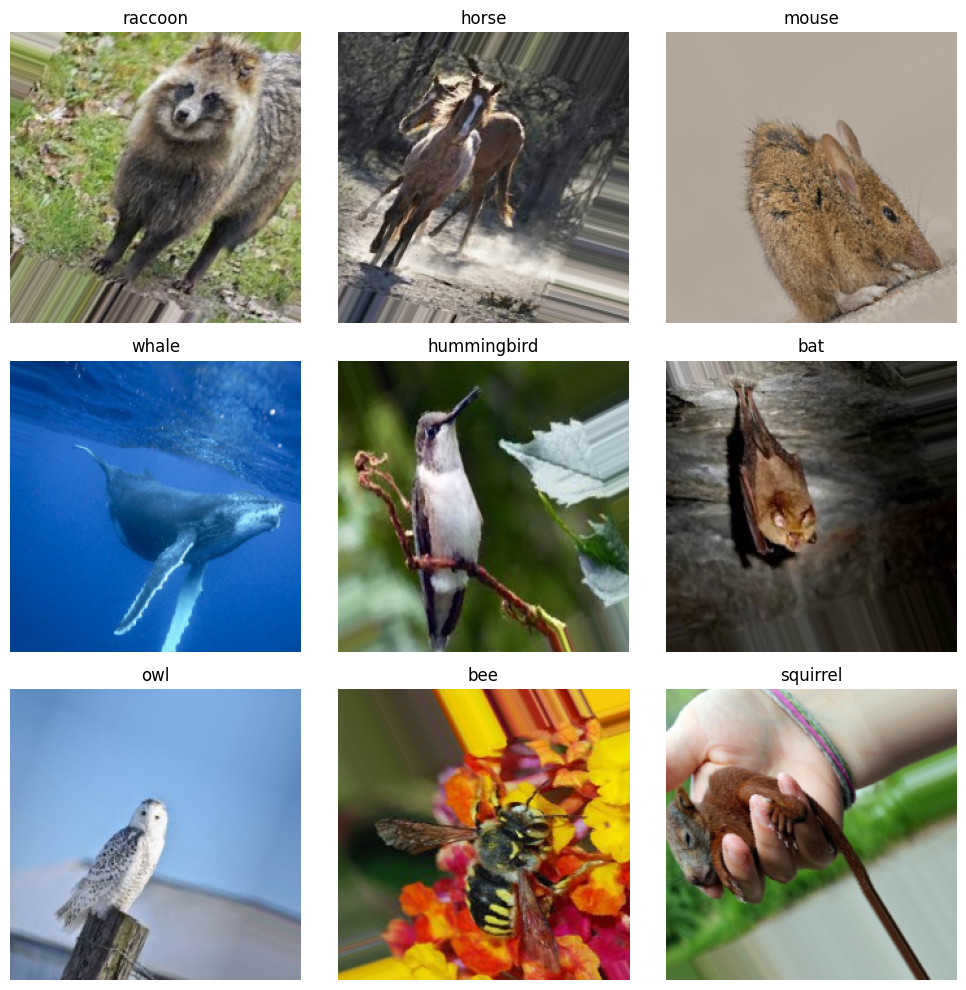

: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot a grid of images with their labels
def plot_sample_images(generator, num_images=9):
    # Get a batch of images and labels
    images, labels = next(generator)
    
    # Calculate the number of rows and columns for the plot
    rows = cols = int(np.sqrt(num_images))
    
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i])
        label_index = np.argmax(labels[i])
        class_name = list(generator.class_indices.keys())[label_index]
        plt.title(class_name)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot 9 sample images from the training set
plot_sample_images(train_generator, num_images=9)


In [ ]:
import collections

# Function to get class distribution
def get_class_distribution(generator):
    labels = []
    for _, label_batch in generator:
        labels.extend(np.argmax(label_batch, axis=1))
        if len(labels) >= generator.samples:
            break
    return collections.Counter(labels)

# Get class distribution for each split
train_distribution = get_class_distribution(train_generator)
val_distribution = get_class_distribution(val_generator)
test_distribution = get_class_distribution(test_generator)

# Function to map label indices back to class names
def map_distribution(distribution, generator):
    mapped = {}
    for label, count in distribution.items():
        class_name = list(generator.class_indices.keys())[label]
        mapped[class_name] = count
    return mapped

# Map distributions to class names
train_distribution_mapped = map_distribution(train_distribution, train_generator)
val_distribution_mapped = map_distribution(val_distribution, val_generator)
test_distribution_mapped = map_distribution(test_distribution, test_generator)

# Print distributions
print("Training Set Class Distribution:")
for class_name, count in train_distribution_mapped.items():
    print(f"{class_name}: {count}")

print("\nValidation Set Class Distribution:")
for class_name, count in val_distribution_mapped.items():
    print(f"{class_name}: {count}")

print("\nTest Set Class Distribution:")
for class_name, count in test_distribution_mapped.items():
    print(f"{class_name}: {count}")


Training Set Class Distribution:
chimpanzee: 42
squid: 39
gorilla: 42
boar: 40
sparrow: 43
pelecaniformes: 42
antelope: 41
coyote: 44
hornbill: 43
orangutan: 42
butterfly: 41
pig: 43
turtle: 43
otter: 41
grasshopper: 43
porcupine: 42
starfish: 42
crow: 41
dragonfly: 43
octopus: 43
cockroach: 43
okapi: 39
dolphin: 42
sheep: 42
rat: 43
hamster: 43
kangaroo: 42
bear: 44
bee: 43
wolf: 41
lizard: 43
turkey: 42
lobster: 43
flamingo: 42
swan: 42
eagle: 42
raccoon: 42
fly: 41
jellyfish: 42
parrot: 43
oyster: 40
deer: 40
snake: 39
lion: 43
zebra: 43
mosquito: 41
duck: 40
penguin: 41
possum: 42
donkey: 42
dog: 43
horse: 40
crab: 42
moth: 41
goat: 44
mouse: 40
hummingbird: 43
rhinoceros: 43
woodpecker: 44
tiger: 44
reindeer: 42
panda: 42
cow: 42
ox: 43
caterpillar: 43
badger: 43
beetle: 42
sandpiper: 42
fox: 41
owl: 40
squirrel: 40
bison: 42
hedgehog: 40
seal: 43
wombat: 43
hare: 43
koala: 40
pigeon: 45
seahorse: 41
elephant: 42
ladybugs: 42
goldfish: 42
leopard: 43
shark: 44
hippopotamus: 42
bat

: 